# KERAS Functional API

Read the Keras documentation for more info:
https://keras.io/getting-started/functional-api-guide/

In [1]:
import keras
from keras import Model
from keras.layers import Input, Dense, LSTM, RepeatVector, TimeDistributed

Using TensorFlow backend.


In [2]:
first_input = Input(shape=(10,))
x = Dense(10)(first_input)
x = Dense(10)(x)
x = Dense(10)(x)
x = Dense(10)(x) # out (None, 10)


second_input = Input(shape=(5,))
y = Dense(20)(second_input)
y = Dense(30)(y)  # out (None, 30)

secondary_output = Dense(100)(y)

merged = keras.layers.concatenate([x, y]) #out (None, 40)
output = Dense(15)(merged)

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
model = Model([first_input, second_input], [output, secondary_output])

In [4]:
model.summary()
#not compiled. use model.compile(...) before training

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 10)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 10)           110         input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 10)           110         dense_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 5)            0                                            
__________________________________________________________________________________________________
dense_3 (D

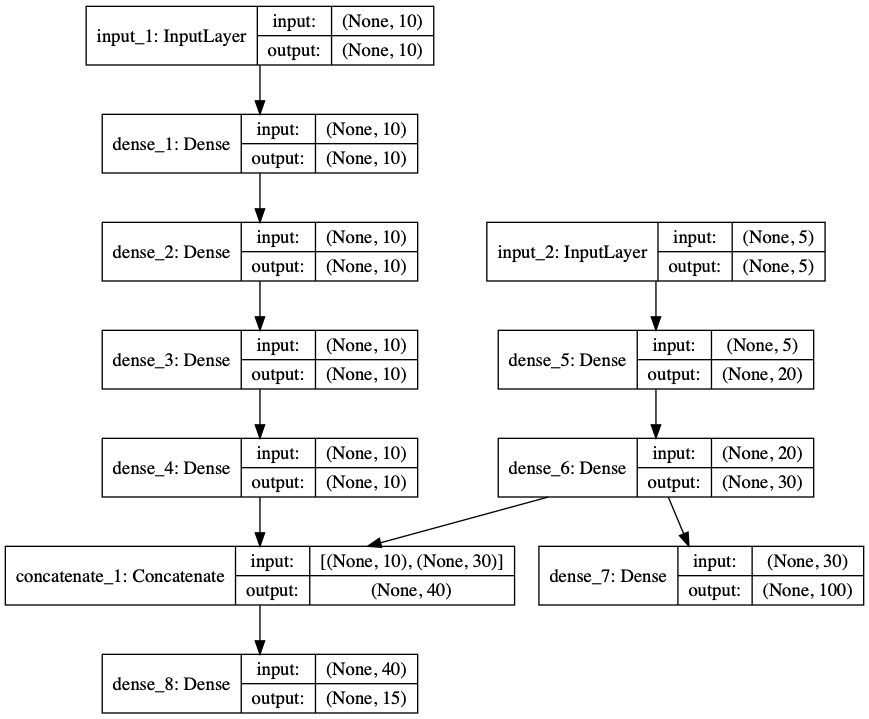

In [9]:
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True)

from IPython.display import Image
Image("model.png")

In [6]:
# won't run since there are no training data
# model.fit([x_train_1, x_train_2], [y_train_1, y_train_2])

In [7]:
half_model = Model(first_input, x)  #we can use this for transfer learning

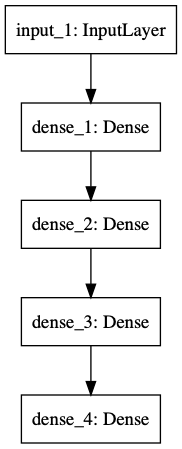

In [8]:
from keras.utils import plot_model

plot_model(half_model, to_file='model2.png')

from IPython.display import Image
Image("model2.png")

# Train Seq2Seq Autoencoder

In [24]:
import numpy as np

In [25]:
# define input sequence
sequence = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(sequence)
sequence = sequence.reshape((1, n_in, 1))

In [26]:
#encoder

model_input = Input(shape=(n_in,1))  #  (batch_size, timesteps, features)
m = LSTM(100, activation='relu')(model_input)

# we have to use RepeatVector to repeat the LSTM state output so it fits into the LSTM decoder
encoder_output = RepeatVector(n_in, name='encoder_output')(m)  

m = LSTM(100, activation='relu', return_sequences=True)(encoder_output)

# we repeat a Dense layer across all the outputs to classify the state in each output's timestep
predictions = TimeDistributed(Dense(1, activation='sigmoid'))(m)

# create the whole model
autoencoder = Model(model_input, predictions)

In [27]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 9, 1)              0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               40800     
_________________________________________________________________
encoder_output (RepeatVector (None, 9, 100)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 9, 100)            80400     
_________________________________________________________________
time_distributed_2 (TimeDist (None, 9, 1)              101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [28]:
encoder = Model(model_input, encoder_output)

In [29]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 9, 1)              0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               40800     
_________________________________________________________________
encoder_output (RepeatVector (None, 9, 100)            0         
Total params: 40,800
Trainable params: 40,800
Non-trainable params: 0
_________________________________________________________________


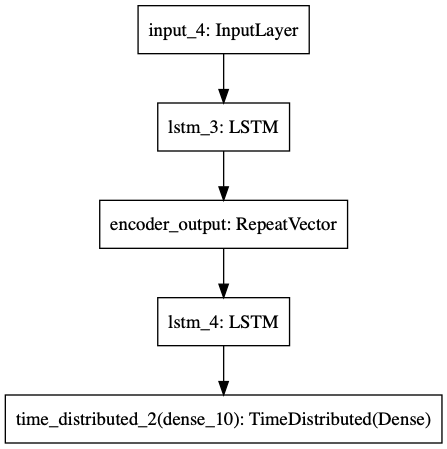

In [30]:
from keras.utils import plot_model

plot_model(autoencoder, to_file='model_3.png')

from IPython.display import Image
Image("model_3.png")

In [31]:
# get intermediate output
from keras.models import Model

layer_name = 'encoder_output'

intermediate_layer_model = Model(inputs=autoencoder.input,
                                 outputs=autoencoder.get_layer(layer_name).output)

#again, we have no data
#intermediate_output = intermediate_layer_model.predict(data)